In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import folium

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Samadi" # change before running the notebook

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
elif user == "Matthew":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "ER131-Project/" + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Samadi
Path to data: /content/drive/MyDrive/ER131-Project/data/


## Load data

In [4]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

Year  Waste Produced (Tons)  ... Multi-Family (units)  Single Family (units)
0  2000.0             1676429.25  ...               203132                 328399
1  2000.0                 745.00  ...                  561                    883
2  2000.0               41059.90  ...                  913                  12563
3  2000.0              203896.87  ...                17317                  53845
4  2000.0               34110.44  ...                  856                  19777

[5 rows x 9 columns]

In [5]:
complete_feature_df['Year_DateTime'] = pd.to_datetime(complete_feature_df['Year'], format="%Y") 
complete_feature_df["Log Waste Produced"] = np.log10(complete_feature_df["Waste Produced (Tons)"])
complete_feature_df.head()

Year  Waste Produced (Tons)  ... Year_DateTime  Log Waste Produced
0  2000.0             1676429.25  ...    2000-01-01            6.224385
1  2000.0                 745.00  ...    2000-01-01            2.872156
2  2000.0               41059.90  ...    2000-01-01            4.613418
3  2000.0              203896.87  ...    2000-01-01            5.309411
4  2000.0               34110.44  ...    2000-01-01            4.532887

[5 rows x 11 columns]

# Waste Generation Overall in California

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



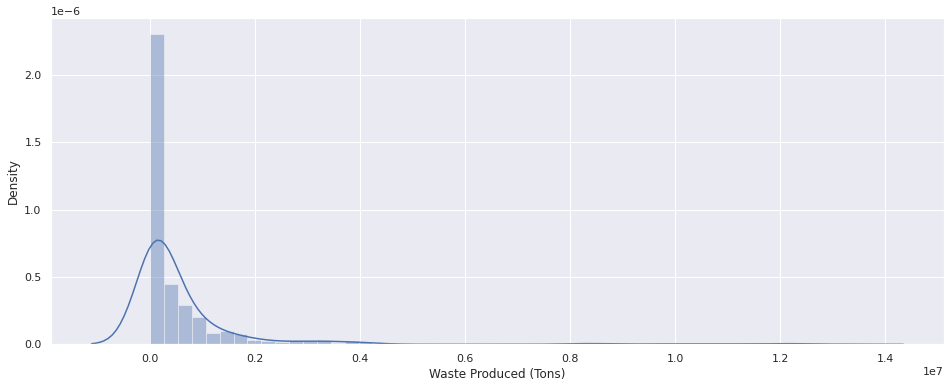

In [7]:
plt.figure(figsize=(16, 6))
sns.distplot(complete_feature_df['Waste Produced (Tons)'], kde=True)


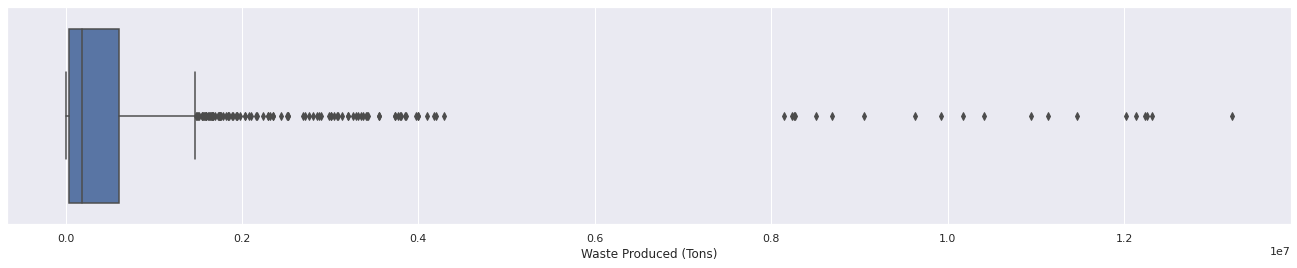

In [8]:
plt.figure(figsize=(23, 4))
box = sns.boxplot(x='Waste Produced (Tons)', data=complete_feature_df)


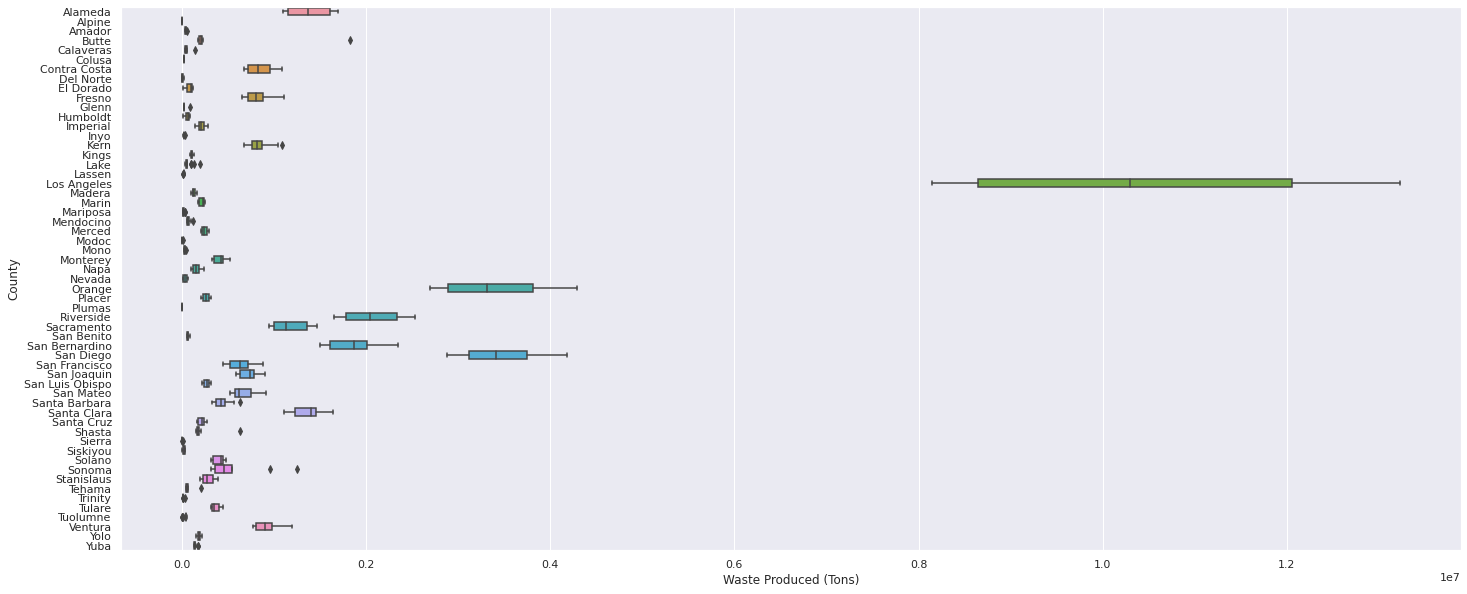

In [9]:
plt.figure(figsize=(24, 10))
sns.boxplot(x='Waste Produced (Tons)', y='County', data=complete_feature_df)

Essentially these figures help to demonstrate the vast range of Waste Produced per county in California. A majority of the reported tons of waste is produced by Los Angeles County, which does logically follow with metropoltian areas producing more waste due to variety of factors i.e. population density, etc. which will be further explored. A majority of counties in California produce waste by tons on a much smaller scale as the highest frequency of waste produced is 0.025 tons and less annually, however, counties like LA county are powerful outliers which results is such a such an vast distribution of waste produced for California overall. 

## Waste Generated over Time 

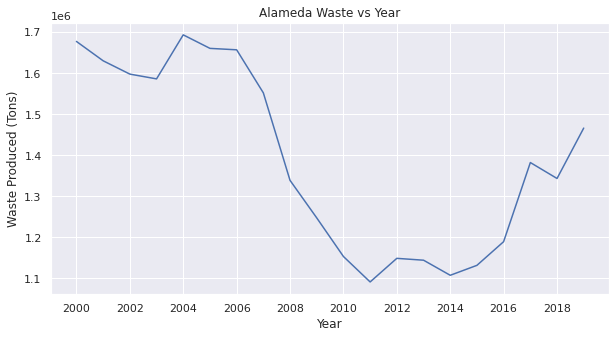

In [10]:
alameda = complete_feature_df[complete_feature_df.County == "Alameda"]

plt.figure(figsize = (10,5))
plt.plot(alameda["Year_DateTime"], alameda["Waste Produced (Tons)"])
plt.ylabel("Waste Produced (Tons)")
plt.xlabel("Year")
plt.title("Alameda Waste vs Year");

In [11]:
counties_list = complete_feature_df.County.unique()
counties_list

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura',
       'Yolo', 'Yuba'], dtype=object)

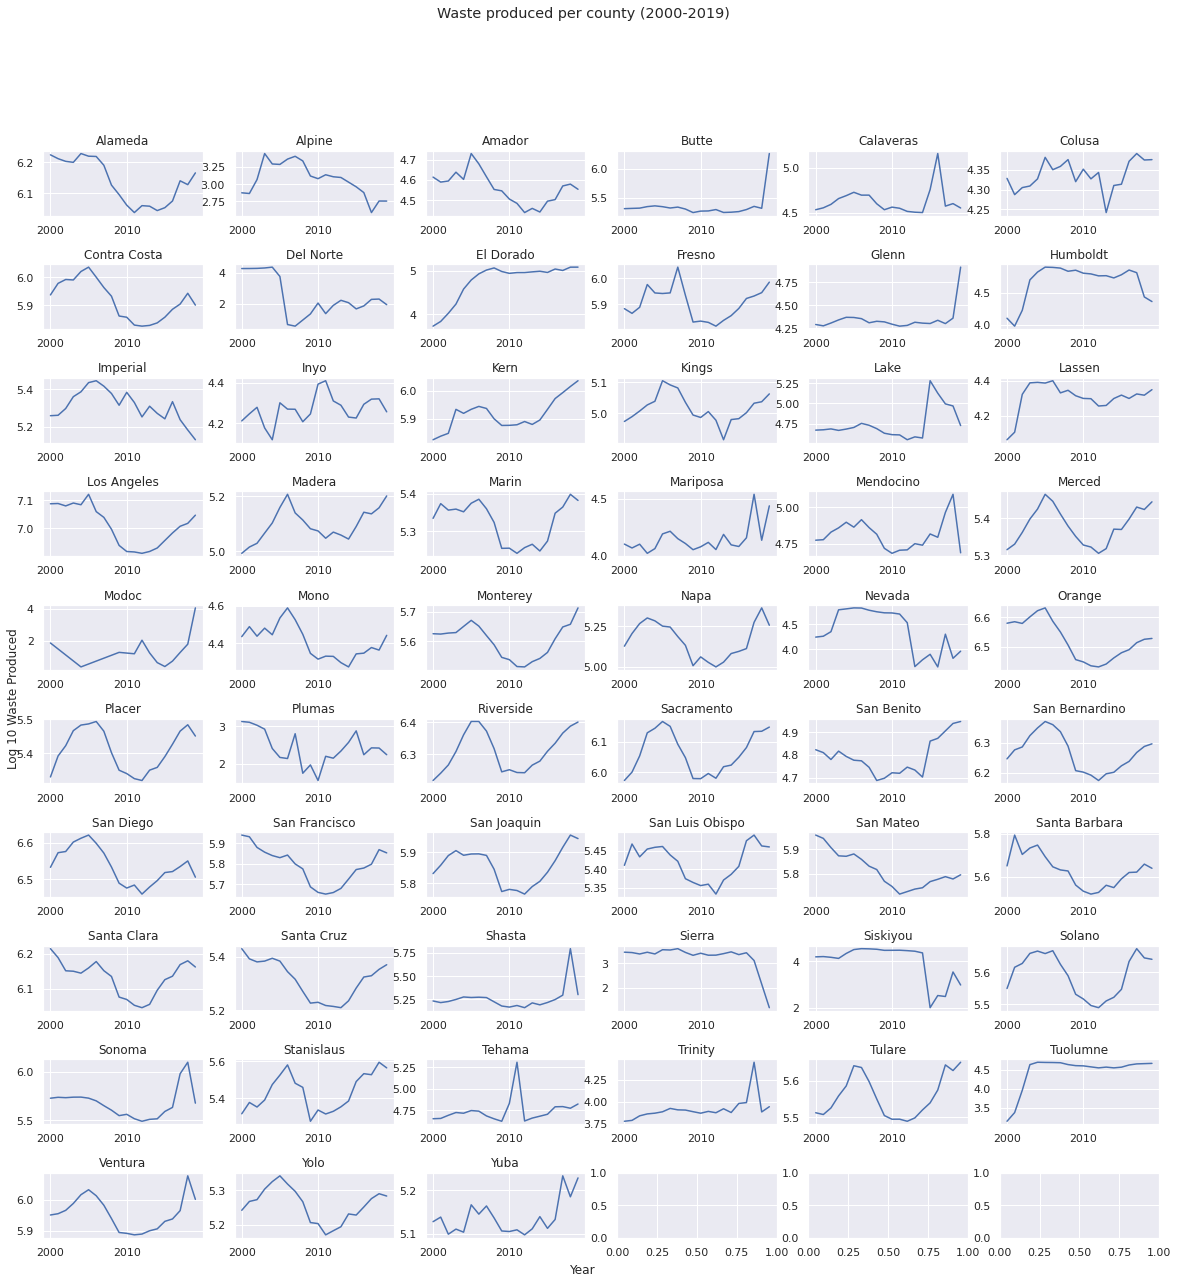

In [12]:
fig, axs = plt.subplots(10, 6, figsize=(20,20), sharex=False, sharey=False)

county_idx=0
for ax in axs.ravel():
    if county_idx < len(counties_list):
        county = counties_list[county_idx]
        county_df = complete_feature_df[complete_feature_df.County == county]
        ax.plot(county_df["Year"], county_df["Log Waste Produced"])
        ax.set_title("{}".format(county))
        county_idx+=1

fig.suptitle("Waste produced per county (2000-2019)")
fig.text(0.1, 0.5, 'Log 10 Waste Produced', va='center', rotation='vertical')
fig.text(0.5, 0.1, 'Year', ha='center')
plt.subplots_adjust(hspace=.75)

In [33]:
fig = px.line(complete_feature_df, x="Year", y="Waste Produced (Tons)", color='County')
fig.show()

Most counties produced less waste during the time period of the recession starting from 2006 which was the beginning of the subprime housing crsis which resulted in the Great Recession. During the Great Recession Counties produced less waste, however as economic stability was regained as time passed so did the the total amount of waste produced.

## Waste vs Other Features

In [14]:
average_data_per_county = complete_feature_df.groupby("County").agg(np.mean)
average_data_per_county.reset_index(inplace=True)
average_data_per_county.head()

County    Year  ...  Single Family (units)  Log Waste Produced
0    Alameda  2009.5  ...              349869.80            6.137181
1     Alpine  2009.5  ...                1017.45            3.068278
2     Amador  2009.5  ...               14680.50            4.559279
3      Butte  2009.5  ...               60858.40            5.349436
4  Calaveras  2009.5  ...               23492.80            4.626993

[5 rows x 10 columns]

### Average Waste Vs. Energy 

In [15]:
#fig = px.line(complete_feature_df, x="Year", y="Electricity Usage (GWh)", color='County')
#fig.show()
#average energy over time is worthless

In [16]:
fig = px.scatter(average_data_per_county, x="Electricity Usage (GWh)", y="Waste Produced (Tons)",
                 size="Population", hover_data=["County"], color="County",
#                  log_x=True, log_y=True, 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Electricity Usage (GWh)": "Average Electricity Usage (gWh)",
                     "Population": "Average Population"
                 },
                 title="Average Yearly CA County Waste vs Electricity Usage & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(average_data_per_county, x="Electricity Usage (GWh)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County",
#                  log_x=True, log_y=True, 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Electricity Usage (GWh)": "Average Electricity Usage (gWh)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Electricity Usage & Population Density (2000-2019)"
                )
fig2.show()



The average yearly waste produced appears positively correlated with the average electricity usage. Althought it is fair to say that CA counties with larger populations are more likely to consume more electricity and produce more waste annually, regardless of whether the region is urban or rural, total population is of greater relevance than population density.

## Geospatial visualization of waste by county

In [17]:
GEOSPATIAL_DATA_PATH = DATA_PATH + "geospatial-data/"
ca_counties_geojson_path = GEOSPATIAL_DATA_PATH + "ca-counties.geojson"

complete_feature_df_2019 = complete_feature_df[complete_feature_df.Year == 2019]
complete_feature_df_2019["Waste Produced"] = np.log(complete_feature_df_2019["Waste Produced (Tons)"])
complete_feature_df_2019.head()

waste_heat_map = folium.Map(location=(37.5, -119.5), zoom_start=6, min_zoom=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=ca_counties_geojson_path,
    data=complete_feature_df_2019,
    columns=['County', 'Waste Produced'],
    key_on='feature.id',
    fill_color='BuPu',
    legend_name='Waste Produced (Log Tons)'
).add_to(waste_heat_map)

# waste_heat_map.save(DATA_PATH + 'ca-waste.html')

waste_heat_map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
GEOSPATIAL_DATA_PATH = DATA_PATH + "geospatial-data/"
ca_counties_geojson_path = GEOSPATIAL_DATA_PATH + "ca-counties.geojson"

feature_inc = pd.read_csv(DATA_PATH + 'median_income_data.csv')

feature_inc_2019 = feature_inc[feature_inc.Year == 2019]
feature_inc_2019.head()

waste_heat_map = folium.Map(location=(37.5, -119.5), zoom_start=6, min_zoom=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=ca_counties_geojson_path,
    data=feature_inc_2019,
    columns=['County', 'Median Income'],
    key_on='feature.id',
    fill_color='Greens',
    legend_name='Median Income'
).add_to(waste_heat_map)

waste_heat_map.save(DATA_PATH + 'ca-waste.html')

waste_heat_map

These visualizations help contextualize the actual areas of CA county's waste output and the impact of wealth. The urban, coastal metropolitan areas have greater wealth demonstrated by their comparatively higher median income, but they do not produce greater amounts of waste overall compared to lower income counties. 

# Housing Analysis

In [21]:
#housing_type = pd.read_csv(DATA_PATH+'housing_units_by_county.csv')
housing_type_county = complete_feature_df[['County','Year','Waste Produced (Tons)','Mobile Homes (units)','Multi-Family (units)','Single Family (units)', 'Population Density (Person per Square Mile)']]
housing_type_county.head()

County  ...  Population Density (Person per Square Mile)
0    Alameda  ...                                  1953.856459
1     Alpine  ...                                     1.636125
2     Amador  ...                                    59.033267
3      Butte  ...                                   124.152744
4  Calaveras  ...                                    39.758434

[5 rows x 7 columns]

In [22]:
fig3 = px.scatter(average_data_per_county, x="Mobile Homes (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Mobile Homes": "Mobile Homes (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Mobile Homes & Population Density (2000-2019)"
                )
fig3.show()
fig4 = px.scatter(average_data_per_county, x="Single Family (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Single Family Homes": "Single Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Single Family Homes & Population Density (2000-2019)"
                )
fig4.show()

fig5 = px.scatter(average_data_per_county, x="Multi-Family (units)", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Multi-Family Homes": "Multi-Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste vs Multi-Family Homes & Population Density (2000-2019)"
                )
fig5.show()
#scatter plot comparing the different housing types and the trash they produce

Interesting the higher the population density in general does not mean that there will be a greater number of homes regardless of the type. This is demonstrated by San Francisco having a high population density but having less housing units in all three categories compared to other counties i.e. Los Angeles, Orange, or San Diego. Perhaps though we can simply consider San Francisco as an outlier due to its county having high housing demand due to variety of factors that make it desirable i.e. Silicon valley, culture, etc. but restriction building regulations resulting in little on the housing market.

Mobile Homes clearly produce the most amount of among the housing types. The total amount of trash produced by Mobile Homes in Orange County was equal to the total amount of trash produced by Mobile Homes in Orange County, despite the total number of Mobile homes being 20 times the total number of Single Family homes. The Multi-family home units produced nearly double the total amount of trash per unit compared to the Single-family homes. Thus overal Single Family Homes produced the least amount of trash per unit, although since Multi-family home units house more people than Single-family home units, per person the total amount of trash produced may be less in Multi-family home units.

# Income Analysis

In [35]:
features_inc = pd.read_csv(DATA_PATH + 'complete_feature_and_income.csv')
features_inc.head()


County    Year  ...  Year_DateTime  Log Waste Produced
0    Alameda  2000.0  ...     2000-01-01            6.224385
1     Alpine  2000.0  ...     2000-01-01            2.872156
2     Amador  2000.0  ...     2000-01-01            4.613418
3      Butte  2000.0  ...     2000-01-01            5.309411
4  Calaveras  2000.0  ...     2000-01-01            4.532887

[5 rows x 12 columns]

In [36]:
fig = px.line(features_inc, x="Year", y="Median Income", color='County')
fig.show()

This figure demonstrates how generally median income has increased for each california county over time, although the Great Recession caused a minor dip in 2007-2009.

In [31]:
fig6 = px.scatter(features_inc, x="Median Income", y="Mobile Homes (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                  labels={
                  
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Mobile Homes": "Mobile Homes (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Mobile Homes in CA Counties Considering Median Income & Population Density"
                )
fig6.show()
fig7 = px.scatter(features_inc, x="Median Income", y="Single Family (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                 labels={
                 
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Single Family Homes": "Single Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Single Family Homes in CA Counties Considering Median Income & Population Density"
                )
fig7.show()

fig8 = px.scatter(features_inc, x="Median Income", y="Multi-Family (units)", size = 'Population Density (Person per Square Mile)',
                  hover_data=["County"], color="County", 
                 labels={
                 
                     "Median Income": "Median Income",
                     #"Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Multi-Family Homes": "Multi-Family (units)",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Multi-Family Homes in CA Counties Considering Median Income & Population Density"
                )
fig8.show()

In general the trend is that CA counties with lower population densities have have more mobile homes, fewer single family homes, and even fewer multi-family home units compared to counties with higher population densities. Essentially there is an inverse relationship between CA counties of low and high population density and housing types.
As the median income progressed the more higher frequency of multi-family homes, and then fewer single family homes, and then even fewer mobile homes; this logically makes sense as one with enough income would typically invest in more expensive and larger real estate to reside in.

In [34]:
fig = px.scatter(features_inc, x="Median Income", y="Waste Produced (Tons)",
                 size="Population", hover_data=["County"], color="County",
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population": "Average Population"
                 },
                 title="Average Yearly CA County Waste Vs Median Income & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(features_inc, x="Median Income", y="Waste Produced (Tons)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Average Yearly CA County Waste Vs Median Income & Population Density (2000-2019)"
                )
fig2.show()

These visualizations demonstrate there is no clear relationship between median income and average waste produced by a CA County, whether they be metropolitans with high population densities or more rural counties with low population densities.

In [27]:
fig = px.scatter(features_inc, x="Median Income", y="Electricity Usage (GWh)",
                 size="Population", hover_data=["County"], color="County",
                 labels={
                     "Electricity Usage" : "Electricity Usage (GWh)",
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income": "Median Income",
                     "Population": "Average Population"
                 },
                 title="Electricity Usage Vs Median Income & Population (2000-2019)"
                )
fig.show()

fig2 = px.scatter(features_inc, x="Median Income", y="Electricity Usage (GWh)",
                 size="Population Density (Person per Square Mile)", hover_data=["County"], color="County", 
                 labels={
                     "Electricity Usage" : "Electricity Usage (GWh)",
                     "Waste Produced (Tons)": "Average Waste Produced (Tons)",
                     "Median Income ($USD)": "Median Income",
                     "Population Density": "Population Density (Person per Square Mile)"
                 },
                 title="Electricity Usage Vs Median Income & Population Density (2000-2019)"
                )
fig2.show()

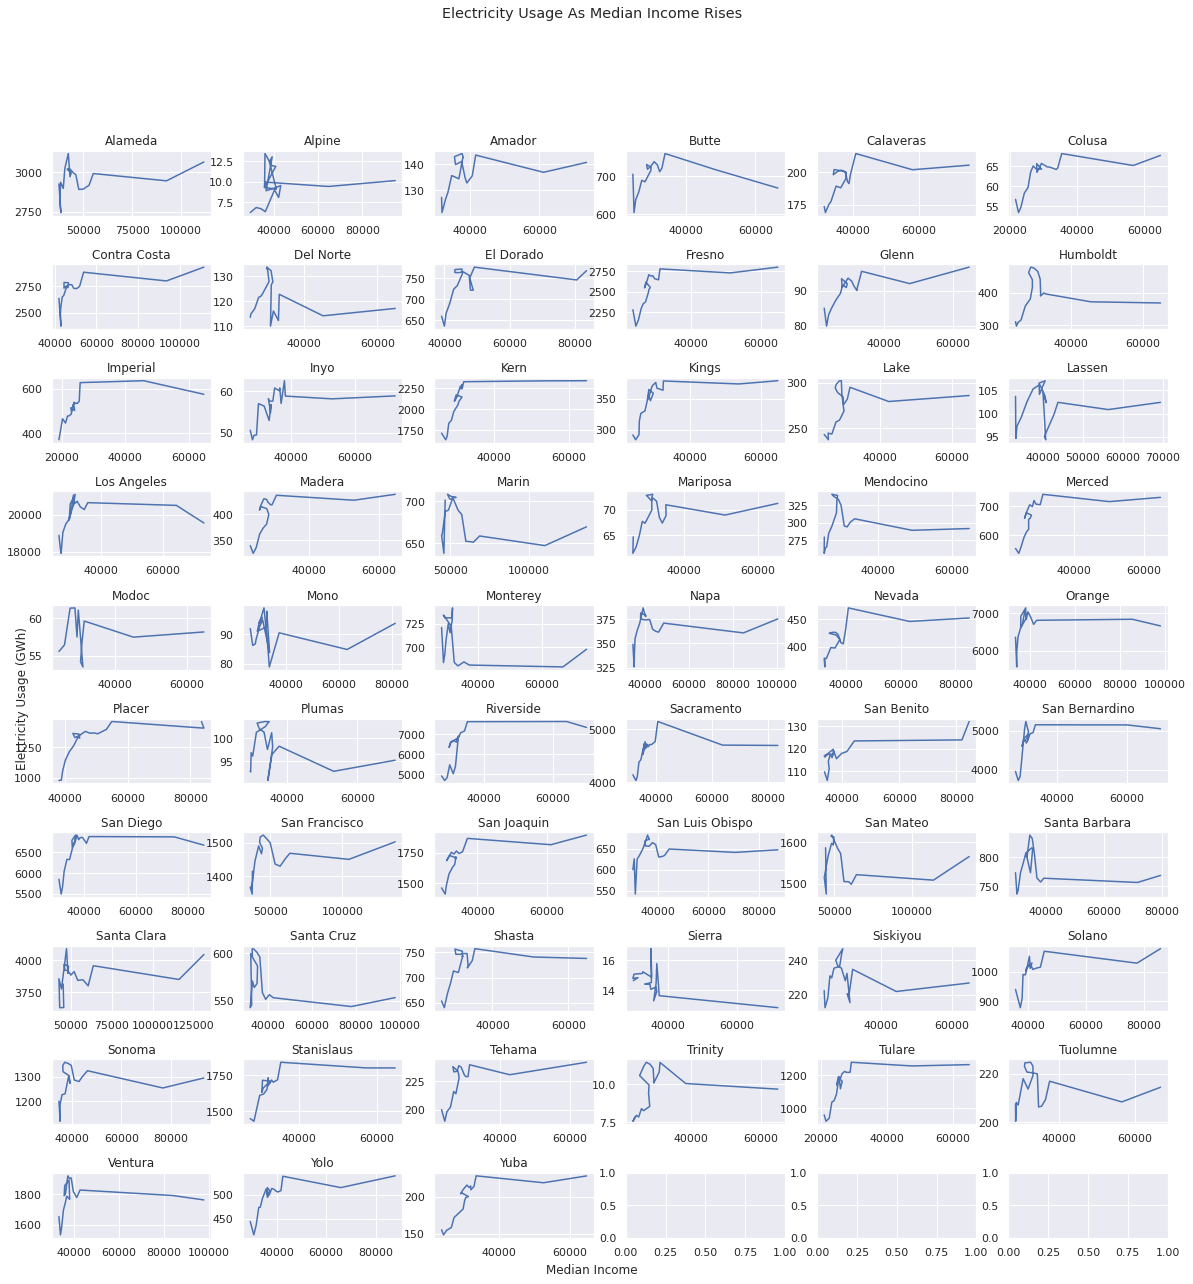

In [28]:
fig, axs = plt.subplots(10, 6, figsize=(20,20), sharex=False, sharey=False)

county_idx=0
for ax in axs.ravel():
    if county_idx < len(counties_list):
        county = counties_list[county_idx]
        county_df = features_inc[features_inc.County == county]
        ax.plot(county_df["Median Income"], county_df["Electricity Usage (GWh)"])
        ax.set_title("{}".format(county))
        county_idx+=1

fig.suptitle("Electricity Usage As Median Income Rises")
fig.text(0.1, 0.5, 'Electricity Usage (GWh)', va='center', rotation='vertical')
fig.text(0.5, 0.1, 'Median Income', ha='center')
plt.subplots_adjust(hspace=.75)

These visualizations demonstrate there is no clear relationship between median income and electricity (GWh) used by a CA County, whether they be metropolitans with high population densities or more rural counties with low population densities. Perhaps you could argue there is a very mild increase with energy consumption as median income within the county increases, but otherwise it's relatively constant even with drastic increases in median income. The only other conclusion that can be drawn is that CA counties with larger total populations are more likely to consume more electricity annually, regardless of whether the region is urban or rural, total population is of greater relevance than population density.